# Model training Experiment

In order to provide the experimental evidence to back up the statement in the section 2.3.2 that our shortcut block can prevent degration problem.

Plain Networks. We first evaluate 5-layer and 11-layer plain nets. Comparing to the 5-layer one, the 11-layer one has three times convolutional layers.

In [25]:
import pickle
import time

import numpy as np
from matplotlib import ticker
from scipy.io import loadmat
from models import Plain5, Plain11, ShortCut5, ShortCut11
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib notebook

## Load data
load data and split them into train, val, test

In [26]:
import random
from numpy.random import seed
import tensorflow
import time
seed(2718)
tensorflow.random.set_seed(2718)
time1 = time.time()
data = loadmat('dataset/mango/mango_dm_split.mat')
training_method = "sgd"
x_train, y_train, x_test, y_test = data['x_train'], data['y_train'], data['x_test'], data['y_test']
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3, random_state=12, shuffle=True)
x_train, x_val, x_test = x_train[:, np.newaxis, :], x_val[:, np.newaxis, :], x_test[:, np.newaxis, :]
print(f"shape of data:\n"
      f"x_train: {x_train.shape}, y_train: {y_train.shape},\n"
      f"x_val: {x_val.shape}, y_val: {y_val.shape}\n"
      f"x_test: {x_test.shape}, y_test: {y_test.shape}")

shape of data:
x_train: (5728, 1, 102), y_train: (5728, 1),
x_val: (2455, 1, 102), y_val: (2455, 1)
x_test: (3508, 1, 102), y_test: (3508, 1)


## Build Plain networks and Training

In [27]:
plain_5, plain_11 = Plain5(input_shape=(1, 102)), Plain11(input_shape=(1, 102))

In [28]:
epoch, batch_size = 2000, 64
history_plain_11 = plain_11.fit(x_train, y_train, x_val, y_val, epoch=epoch, batch_size=batch_size,
                                method=training_method)
history_plain_5 = plain_5.fit(x_train, y_train, x_val, y_val, epoch=epoch, batch_size=batch_size,
                              method=training_method)

Epoch 1/2000
90/90 [==============================] - 3s 10ms/step - loss: 0.0285 - val_loss: 0.0286 - lr: 0.0025
Epoch 2/2000
90/90 [==============================] - 0s 5ms/step - loss: 0.0273 - val_loss: 0.0287 - lr: 0.0025
Epoch 3/2000
90/90 [==============================] - 1s 7ms/step - loss: 0.0266 - val_loss: 0.0292 - lr: 0.0025
Epoch 4/2000
90/90 [==============================] - 0s 4ms/step - loss: 0.0264 - val_loss: 0.0292 - lr: 0.0025
Epoch 5/2000
90/90 [==============================] - 0s 4ms/step - loss: 0.0258 - val_loss: 0.0289 - lr: 0.0025
Epoch 6/2000
90/90 [==============================] - 0s 5ms/step - loss: 0.0253 - val_loss: 0.0283 - lr: 0.0025
Epoch 7/2000
90/90 [==============================] - 0s 5ms/step - loss: 0.0251 - val_loss: 0.0269 - lr: 0.0025
Epoch 8/2000
90/90 [==============================] - 0s 5ms/step - loss: 0.0249 - val_loss: 0.0263 - lr: 0.0025
Epoch 9/2000
90/90 [==============================] - 0s 5ms/step - loss: 0.0247 - val_loss: 0.

Save the result to history.p

In [29]:
# import pickle
# with open('history.p', 'wb') as f:
#     pickle.dump({'history_11': history_plain_11, 'history_5':history_plain_5}, f)

## Post analysis and drawing

In [30]:
# with open("history.p", 'rb') as f:
#     data = pickle.load(f)
# history_plain_11, history_plain_5 = data['history_11'], data['history_5']

In [31]:
smoothing_windows = 16
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

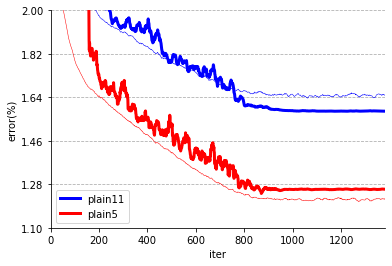

In [44]:
%matplotlib inline
fig, ax = plt.subplots()
x = np.array(range(len(history_plain_11.history['loss']) - smoothing_windows + 1))
ax.plot(x, 100*moving_average(history_plain_11.history["val_loss"], smoothing_windows), linewidth=3.0, label='plain11', c='b')
ax.plot(x, 100*moving_average(history_plain_11.history["loss"], smoothing_windows), linewidth=.5, c='b')
x = np.array(range(len(history_plain_5.history['loss']) - smoothing_windows + 1))
ax.plot(x, 100*moving_average(history_plain_5.history["val_loss"], smoothing_windows), linewidth=3.0, label='plain5', c='r')
ax.plot(x, 100*moving_average(history_plain_5.history["loss"], smoothing_windows), linewidth=.5, c='r')
ax.set_xlabel("iter")
ax.set_ylabel("error(%)")
ax.set_xlim(0, min(len(history_plain_5.history['loss']), len(history_plain_11.history['loss']) - smoothing_windows + 1))
ax.set_ylim(1.1, 2)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.yaxis.set_major_locator(ticker.LinearLocator(numticks=6))
ax.grid(axis='y', linestyle='--')
ax.annotate("11-layer", (540, 0.267), c='b')
ax.annotate("5-layer", (540, 0.245), c='r')
plt.legend(loc=3)
plt.show()

In [33]:
# plt.savefig(fname="fig1.png", dpi=300)

In [47]:
seed(9999)
tensorflow.random.set_seed(9999)
shortcut5, shortcut11 = ShortCut5(input_shape=(1, 102)), ShortCut11(input_shape=(1, 102))

In [48]:
epoch, batch_size = 2000, 128
history_shortcut_11 = shortcut11.fit(x_train, y_train, x_val, y_val, epoch=epoch, batch_size=batch_size, method=training_method)
history_shortcut_5 = shortcut5.fit(x_train, y_train, x_val, y_val, epoch=epoch, batch_size=batch_size, method=training_method)

Epoch 1/2000
45/45 [==============================] - 1s 7ms/step - loss: 0.0267 - val_loss: 0.0272 - lr: 0.0050
Epoch 2/2000
45/45 [==============================] - 0s 3ms/step - loss: 0.0255 - val_loss: 0.0267 - lr: 0.0050
Epoch 3/2000
45/45 [==============================] - 0s 3ms/step - loss: 0.0247 - val_loss: 0.0266 - lr: 0.0050
Epoch 4/2000
45/45 [==============================] - 0s 3ms/step - loss: 0.0244 - val_loss: 0.0264 - lr: 0.0050
Epoch 5/2000
45/45 [==============================] - 0s 3ms/step - loss: 0.0241 - val_loss: 0.0262 - lr: 0.0050
Epoch 6/2000
45/45 [==============================] - 0s 2ms/step - loss: 0.0238 - val_loss: 0.0261 - lr: 0.0050
Epoch 7/2000
45/45 [==============================] - 0s 2ms/step - loss: 0.0234 - val_loss: 0.0256 - lr: 0.0050
Epoch 8/2000
45/45 [==============================] - 0s 3ms/step - loss: 0.0232 - val_loss: 0.0254 - lr: 0.0050
Epoch 9/2000
45/45 [==============================] - 0s 2ms/step - loss: 0.0231 - val_loss: 0.0

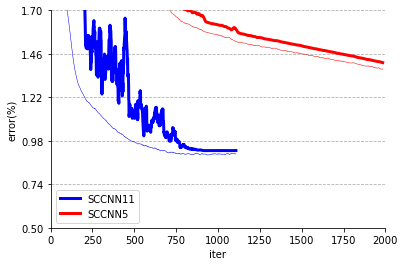

In [49]:
fig, ax = plt.subplots()
x = np.array(range(len(history_shortcut_11.history['loss']) - smoothing_windows + 1))
ax.plot(x, 100*moving_average(history_shortcut_11.history["val_loss"], smoothing_windows), linewidth=3.0, label='SCCNN11', c='b')
ax.plot(x, 100*moving_average(history_shortcut_11.history["loss"], smoothing_windows), linewidth=.5, c='b')
x = np.array(range(len(history_shortcut_5.history['loss']) - smoothing_windows + 1))
ax.plot(x, 100*moving_average(history_shortcut_5.history["val_loss"], smoothing_windows), linewidth=3.0, label='SCCNN5', c='r')
ax.plot(x, 100*moving_average(history_shortcut_5.history["loss"], smoothing_windows), linewidth=.5, c='r')
ax.set_xlabel("iter")
ax.set_ylabel("error(%)")
ax.set_xlim(0, 2000)
ax.set_ylim(0.5, 1.7)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.yaxis.set_major_locator(ticker.LinearLocator(numticks=6))
ax.grid(axis='y', linestyle='--')
ax.annotate("11-layer", (500, 0.24), c='b')
ax.annotate("5-layer", (500, 0.255), c='r')
plt.legend(loc=3)
plt.show()

In [37]:
# plt.savefig(fname="fig2.png", dpi=300)

In [38]:
import os
time_spent = (time.time() - time1) /60

In [39]:
print(time_spent, "min")

18.78054288228353 min
